# Notebook to combine all well data for visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

%matplotlib inline

In [2]:
data = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../data/wells/*.csv"))), sort=False)
data.to_csv('../data/all_wells.csv', index=False)

In [3]:
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),...,water 3,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12
0,6300.0,53700.0,0.05,0.009,0.305,1.058935e+07,0.118212,0.881788,870417.418369,393.486280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6401.0,53700.0,0.03,0.004,0.305,1.059206e+07,0.117850,0.882150,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6502.0,53700.0,0.05,0.008,0.305,1.059487e+07,0.117492,0.882508,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6602.0,53700.0,0.03,0.003,0.305,1.059776e+07,0.117138,0.882862,860887.258744,278.775058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6703.0,53700.0,0.03,0.003,0.304,1.060074e+07,0.116788,0.883212,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def plot_feature(feature):
    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.title(feature)
    plt.scatter(data['easting'], data['northing'], c=data[feature])
    plt.colorbar(label=feature)

Visualizing porosity

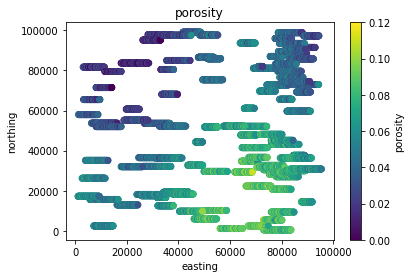

In [5]:
plot_feature('porosity')

Plotting permeability

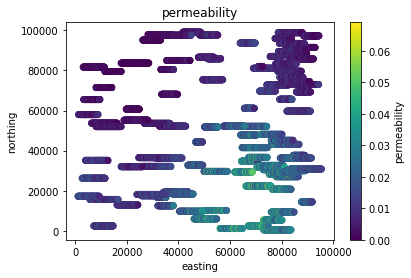

In [6]:
plot_feature('permeability')

Plotting Poisson's ratio

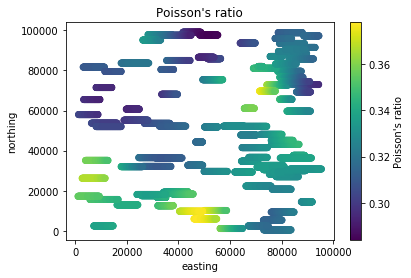

In [7]:
plot_feature('Poisson\'s ratio')

Plotting water saturation

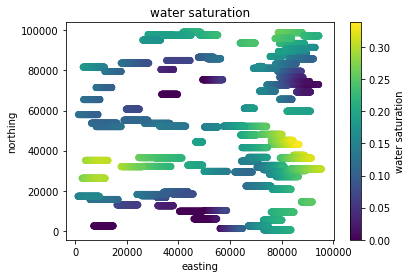

In [8]:
plot_feature('water saturation')

Plotting oil saturation

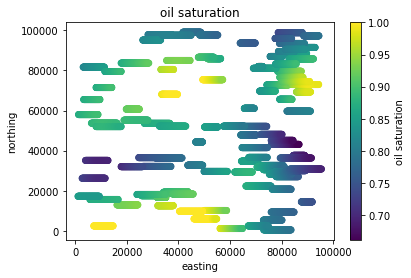

In [9]:
plot_feature('oil saturation')